# Decision Trees

A decision tree is a decision support recursive partitioning structure that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements

## Task:

Use Social_Network_Ads.csv dataset to classify if the user buys or not a product.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Exploratory Data Analysis

Dataset info

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [50]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Checking for missing values


In [45]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Correlation matrix

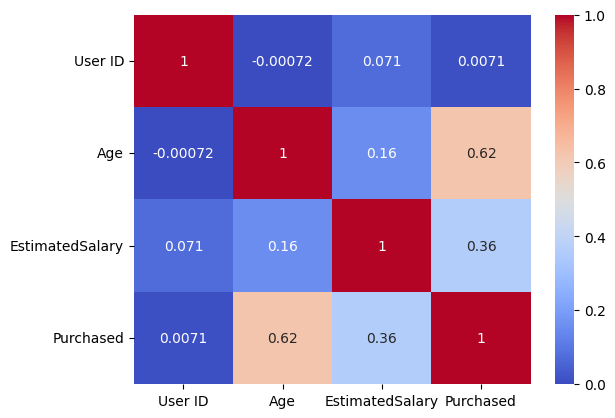

In [49]:
numeric_df=dataset.select_dtypes(include='int64')
correlation=numeric_df.corr()
sns.heatmap(correlation, cmap='coolwarm',annot=True)
plt.show()

Boxplot

<Axes: >

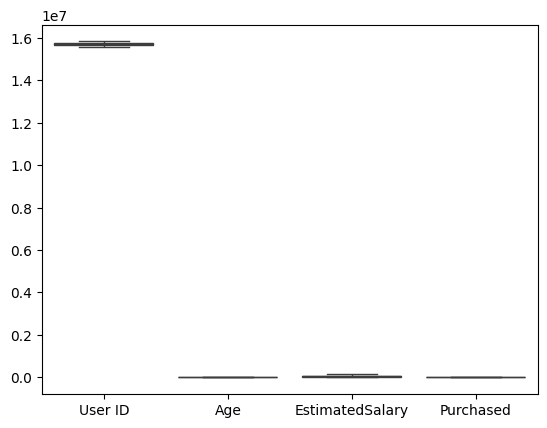

In [51]:
sns.boxplot(dataset)

### Create variables X and y

In [9]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1]

In [11]:
print(len(X),len(y))

400 400


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [12]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


### Split Data 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

Feature scaling is a technique used in data preprocessing to **normalize** the range of independent variables or features in a dataset. It ensures that all features contribute equally to the model, which is especially important for algorithms sensitive to the scale of data, such as gradient descent and distance-based methods.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train the Decision Tree Classifier Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state =0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

make predictions

In [19]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

### Confusion Matrix

In predictive analytics, a table of confusion (sometimes also called a confusion matrix) is a table with two rows and two columns that reports the number of true positives, false negatives, false positives, and true negatives.

- True Positive (TP):	Correctly identifies a positive case (condition present)
- False Positive (FP):	Incorrectly identifies a positive case (condition absent)
- True Negative (TN):	Correctly identifies a negative case (condition absent)
- False Negative (FN):	Incorrectly identifies a negative case (condition present)

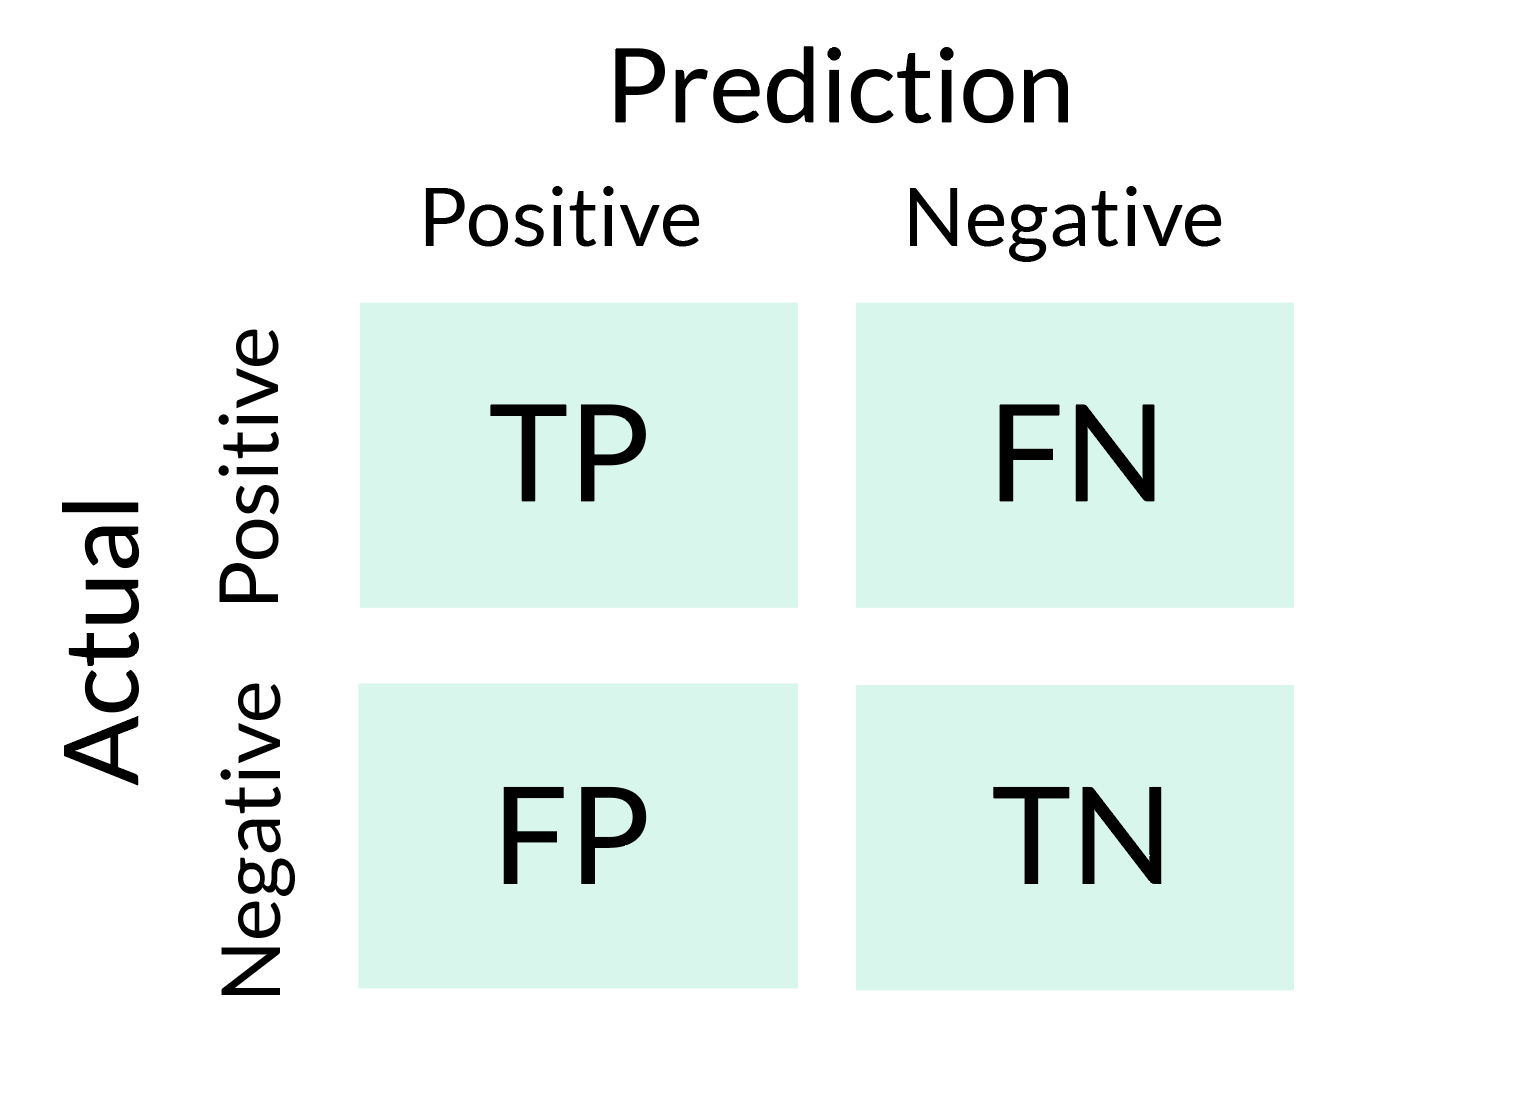

<Axes: >

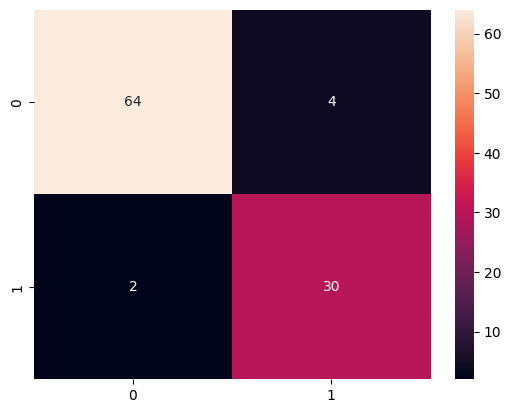

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

#call heatmap method to plot confusion matrix
sns.heatmap(cm, annot = True)


### Classification Report

When using classification models in machine learning, there are three common metrics that we use to assess the quality of the model:

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



### Accuracy

In [25]:
from sklearn import metrics

print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.94


### Decision Tree Plot

[Text(0.5, 0.875, 'x[0] <= 0.631\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(0.25, 0.625, 'x[1] <= 0.606\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= -0.161\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.1875, 0.125, 'gini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.375, 0.375, 'x[0] <= -1.151\ngini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4375, 0.125, 'gini = 0.229\nsamples = 38\nvalue = [5, 33]'),
 Text(0.75, 0.625, 'x[0] <= 0.829\ngini = 0.275\nsamples = 85\nvalue = [14, 71]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= -0.51\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.5625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.6875, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.875, 0.375, 'x[1] <= -

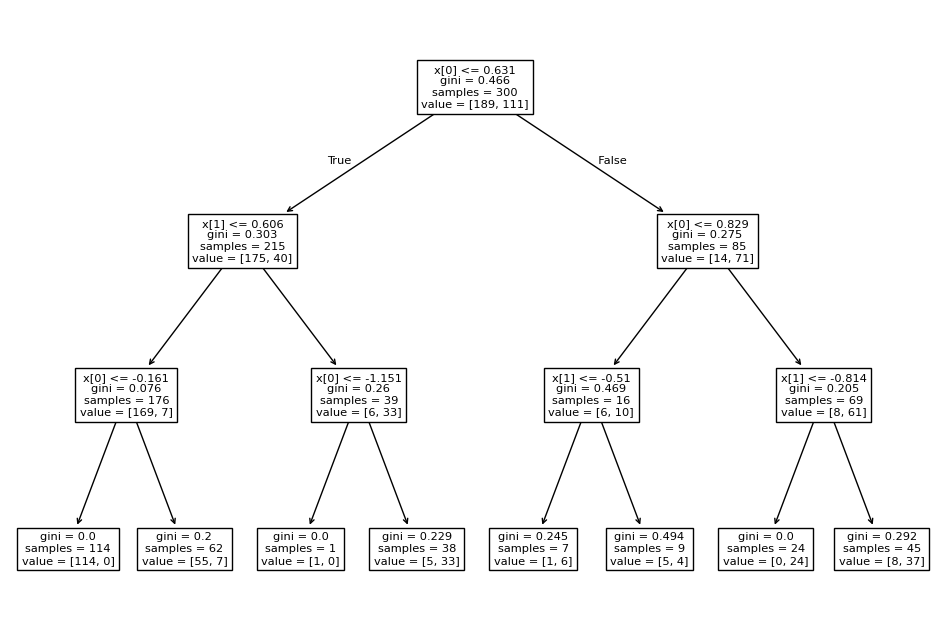

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train))


### Decision Boundary Plots

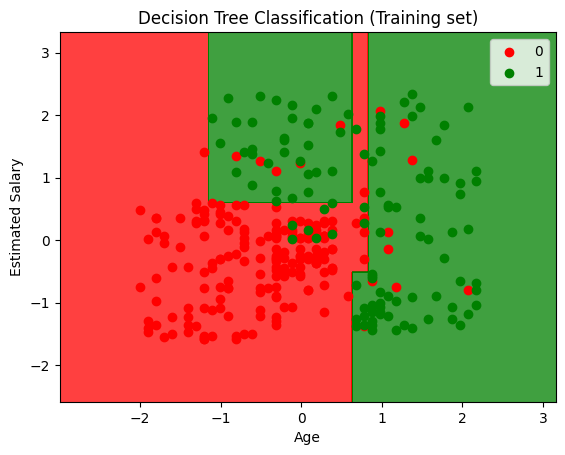

In [40]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = ('red', 'green')
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=colors[i], label=j
    )

plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


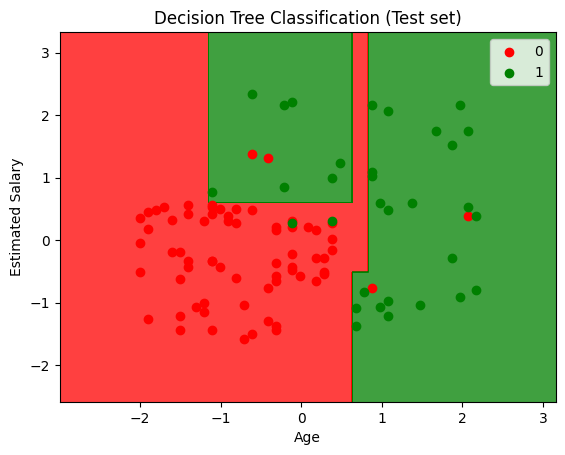

In [52]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = ('red', 'green')
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=colors[i], label=j
    )

plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')  # second feature label
plt.legend()
plt.show()
